In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset from Google Drive link
url = "https://drive.google.com/uc?export=download&id=1YrjYKtS1WHmINL6eafRsrDzrZaw2_WvX"
data = pd.read_csv(url)

In [ ]:
# Display basic information about the dataset
print("Dataset Overview:")
print(data.info())
print(data.describe())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code

In [ ]:
# 1. Sales Overview: Identifying sales trends and peak periods
data['Date'] = pd.to_datetime(data['Date'])
sales_over_time = data.groupby(data['Date'].dt.to_period("M")).agg({"Amount": "sum"}).reset_index()

<ipython-input-13-872b1772a7fc>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


In [ ]:
# Drop rows with invalid date or amount
data = data.dropna(subset=['Date', 'Amount'])

In [ ]:
# 1. Sales Overview: Identifying sales trends and peak periods
# Aggregate sales by month
sales_over_time = data.groupby(data['Date'].dt.to_period("M")).agg({"Amount": "sum"}).reset_index()
sales_over_time.columns = ['Date', 'Amount']  # Rename columns for consistency

In [ ]:
# Convert 'Date' back to datetime for plotting
sales_over_time['Date'] = sales_over_time['Date'].dt.to_timestamp()

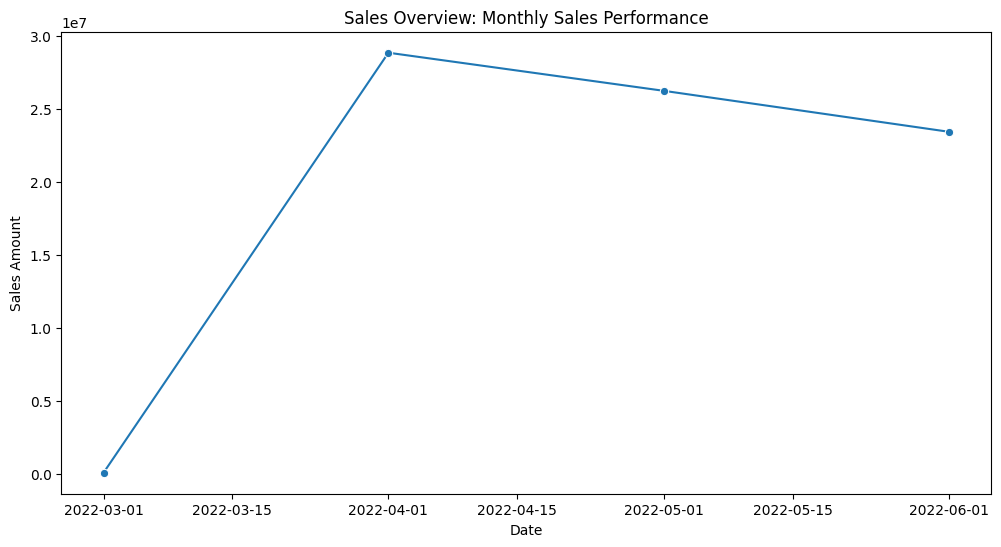

In [ ]:
# Plotting sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_over_time, x="Date", y="Amount", marker='o')
plt.title("Sales Overview: Monthly Sales Performance")
plt.xlabel("Date")
plt.ylabel("Sales Amount")
plt.show()

In [ ]:
# Recommendation based on Sales Overview
print("Recommendation 1: Align marketing and inventory with high-demand periods to reduce stockouts and maximize sales.")


Recommendation 1: Align marketing and inventory with high-demand periods to reduce stockouts and maximize sales.


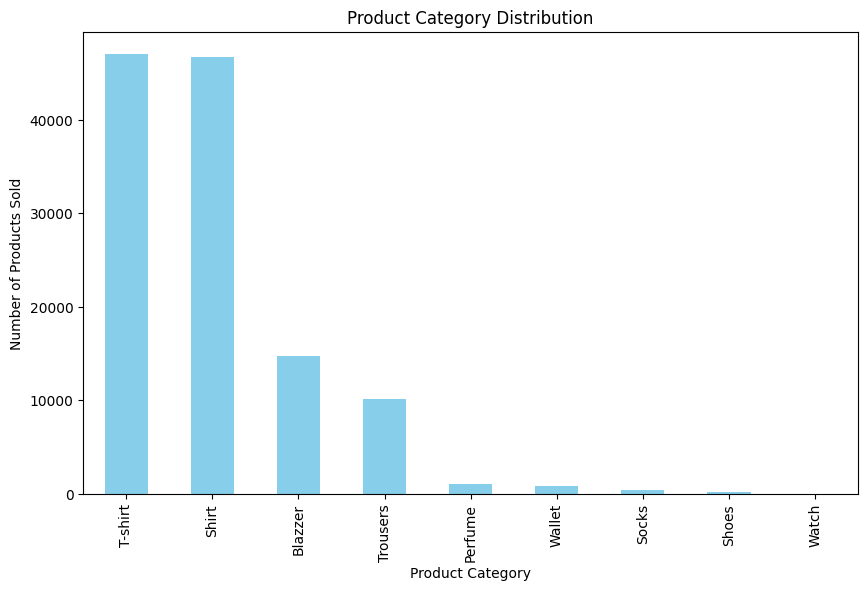

In [ ]:
# 2. Product Analysis: Understanding popular products and demand patterns
product_distribution = data['Category'].value_counts()
plt.figure(figsize=(10, 6))
product_distribution.plot(kind='bar', color='skyblue')
plt.title("Product Category Distribution")
plt.xlabel("Product Category")
plt.ylabel("Number of Products Sold")
plt.show()

In [ ]:
# Recommendation based on Product Analysis
print("Recommendation 2: Focus on marketing high-performing products and ensure adequate stock. Consider revising low-performing products.")

Recommendation 2: Focus on marketing high-performing products and ensure adequate stock. Consider revising low-performing products.


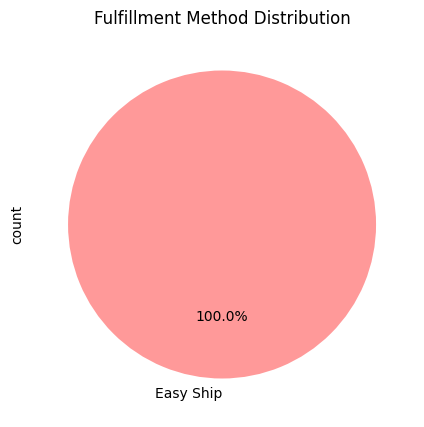

In [ ]:
# 3. Fulfillment Analysis: Assessing fulfillment methods and their efficiency
fulfillment_counts = data['fulfilled-by'].value_counts()
plt.figure(figsize=(8, 5))
fulfillment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title("Fulfillment Method Distribution")
plt.show()

In [ ]:
# Recommendation based on Fulfillment Analysis
print("Recommendation 3: Prioritize reliable fulfillment methods to enhance customer satisfaction and repeat purchases.")

Recommendation 3: Prioritize reliable fulfillment methods to enhance customer satisfaction and repeat purchases.


In [ ]:
# 4. Customer Segmentation: Segmenting customers based on purchase behavior
customer_segments = data.groupby('Order ID').agg({
    'Amount': 'sum',  # Total amount spent
    'Order ID': 'count'  # Total orders placed
}).rename(columns={'Amount': 'total_spent', 'Order ID': 'num_orders'})
print("Customer Segmentation Summary:")
print(customer_segments.describe())
print(customer_segments.head())

Customer Segmentation Summary:
         total_spent     num_orders
count  112887.000000  112887.000000
mean      696.184417       1.073427
std       369.393091       0.338600
min         0.000000       1.000000
25%       459.000000       1.000000
50%       635.000000       1.000000
75%       824.000000       1.000000
max      8636.000000      12.000000
                     total_spent  num_orders
Order ID                                    
171-0000547-8192359        301.0           1
171-0000902-4490745        544.0           1
171-0001409-6228339        422.0           1
171-0003082-5110755        563.0           1
171-0003738-2052324        379.0           1


In [ ]:
# Recommendation based on Customer Segmentation
print("Recommendation 4: Use targeted marketing for high-value customer segments and offer tailored promotions based on location and behavior.")

Recommendation 4: Use targeted marketing for high-value customer segments and offer tailored promotions based on location and behavior.


In [ ]:
# 5. Geographical Analysis: Analyzing sales distribution across locations
sales_by_location = data.groupby(['ship-state', 'ship-city'])['Amount'].sum().reset_index()
top_cities = sales_by_location.sort_values(by='Amount', ascending=False).head(10)

<ipython-input-47-46028c3d978d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Amount", y="ship-city", data=top_cities, palette="viridis")


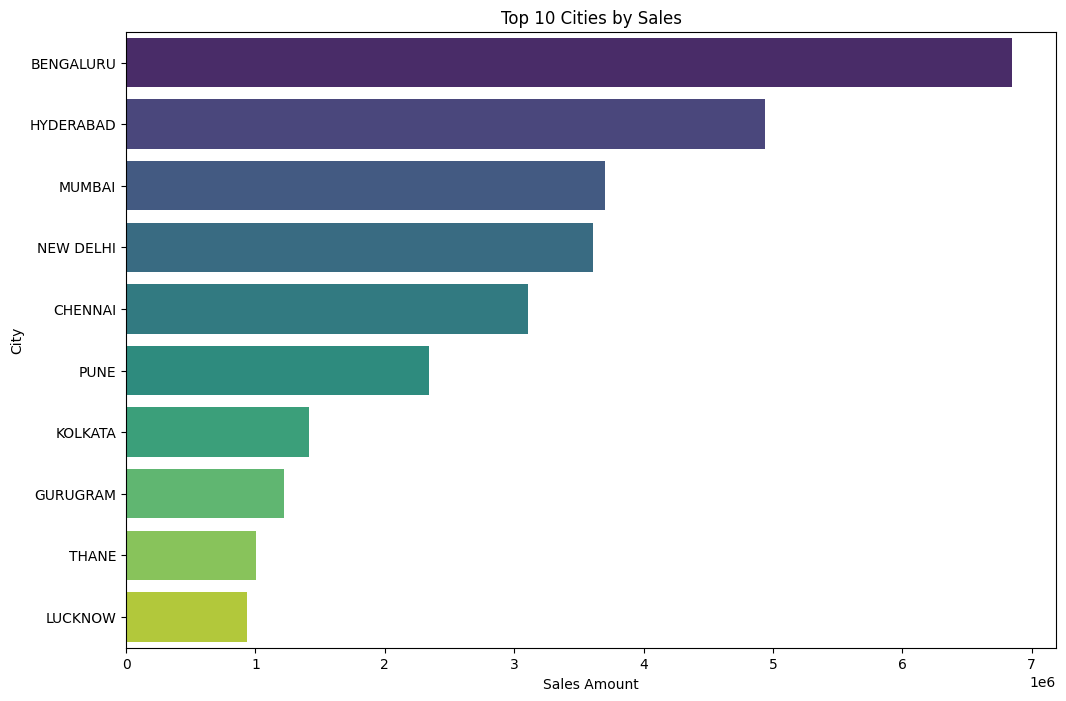

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x="Amount", y="ship-city", data=top_cities, palette="viridis")
plt.title("Top 10 Cities by Sales")
plt.xlabel("Sales Amount")
plt.ylabel("City")
plt.show()

In [ ]:
# Recommendation based on Geographical Analysis
print("Recommendation 5: Optimize inventory and shipping in high-demand regions to improve delivery times and reduce logistics costs.")

Recommendation 5: Optimize inventory and shipping in high-demand regions to improve delivery times and reduce logistics costs.


In [ ]:
# 6. Business Insights: Summarizing actionable insights from the analysis
print("\nBusiness Insights Summary:")
print("1. Align inventory and marketing with demand trends identified in the Sales Overview.")
print("2. Promote popular products and revise inventory for low-demand items.")
print("3. Improve customer experience through reliable fulfillment methods.")
print("4. Target specific customer segments with personalized marketing.")
print("5. Focus resources in high-demand regions to optimize operations and customer satisfaction.")


Business Insights Summary:
1. Align inventory and marketing with demand trends identified in the Sales Overview.
2. Promote popular products and revise inventory for low-demand items.
3. Improve customer experience through reliable fulfillment methods.
4. Target specific customer segments with personalized marketing.
5. Focus resources in high-demand regions to optimize operations and customer satisfaction.
